# Predicting Wine Quality

We want to predict the quality of a wine, so for this dataset, you must split it into a train and test set. Leave the test set till the very end to check model performance!

1) Perform EDA to get an idea as to what the underlyng patterns may be between a good and bad wine

> Remember, our squishy human brains can only contend with a few variables at a time, so the ultimate objective is to build a model that codifies the patterns present accross SEVERAL variables, to build a roboust predictor of wine quality

2) Clean Data

> Remember, We want to have our data be as clean as possible, remove NaNs, group sparse classes, etc...
> Reductive Process

3) Engineer Features

> Create new features that add value to your data, no redundant features!!
> Creatuive Process

4) Run Models

> You may have to repeat the steps above if your model is underperforming

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [64]:
df = pd.read_csv('Wine_Quality.csv')

In [131]:
df = df.dropna()

In [133]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality num             0
is nappa                0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null object
dtypes: float64(11), object(2)
memory usage: 659.9+ KB


In [75]:
df.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  quality num  
0       0.45      8.8  Average            2  
1       0.49      9.5  Average            2  
2       0.44     10.1  Average            2  
3       0.40      9.9  Average            2  
4       0.40      9.9  Average            2  
5       0.44     10.1  Average            2  
6       0.47      9.6  Average            2  
7       0.45      8.8  Average            2  
8       0.49      9.5  Average            2  
9       0.45     11.0  Average            2

<br>

### This is a multilabel classification task!

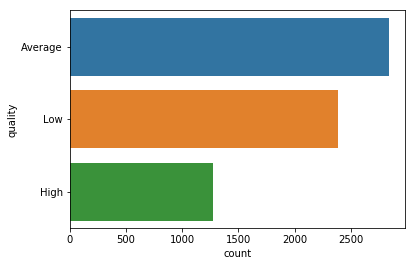

In [67]:
sns.countplot(y = df['quality'])
plt.show()

## Weird Stuff in Corr After Column Drops

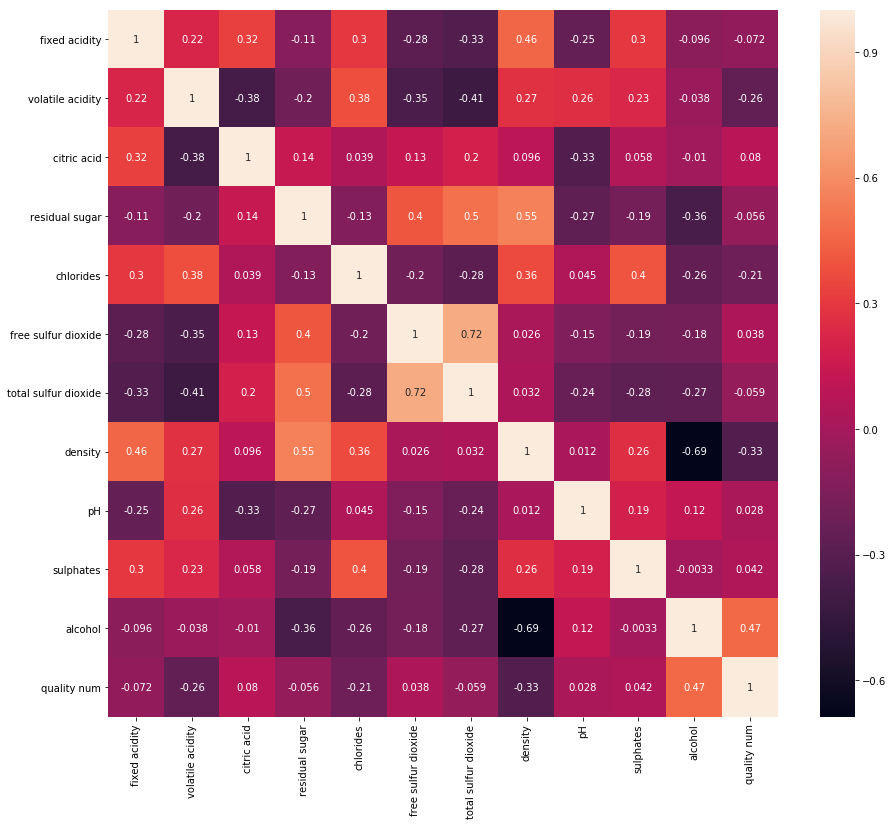

In [77]:
fig = plt.figure(figsize=(15,13))
my_ax = fig.gca()
sns.heatmap(data = df.corr(), annot= True, ax=my_ax)
plt.show()

In [80]:
corr_columns = ['volatile acidity', 'chlorides', 'density','alcohol', 'quality num']

In [73]:
df['quality num'] = df['quality'].replace(['Low','Average', 'High'],[1, 2, 3])

In [137]:
df_correlated = df[corr_columns]

In [138]:
df_correlated.head()

volatile acidity  chlorides  density  alcohol  quality num
0              0.27      0.045   1.0010      8.8            2
1              0.30      0.049   0.9940      9.5            2
2              0.28      0.050   0.9951     10.1            2
3              0.23      0.058   0.9956      9.9            2
4              0.23      0.058   0.9956      9.9            2

In [139]:
df_correlated.isnull().sum()

volatile acidity    0
chlorides           0
density             0
alcohol             0
quality num         0
dtype: int64

In [98]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Cross Validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To Test final Model on out of sample data
from sklearn.model_selection import train_test_split

# to make pipelines
from sklearn.pipeline import make_pipeline

# for scaling data in pipeline
from sklearn.preprocessing import StandardScaler

In [140]:
X = df_correlated.drop(['quality num'], axis=1)
y = df_correlated['quality num']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, train_size= .8, random_state=123)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [101]:
pipeline_dict = {
    "rf":make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    "gb":make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

#  RandomizedSearchCV

### Random Grid

In [148]:
hp_dict_rand = {
    "rf": {
        'randomforestclassifier__n_estimators': [50,100,200,300,400,500],
        'randomforestclassifier__max_depth': [None,1,2,3,4,5,6,7,8,9,10,25,50,100], 
        'randomforestclassifier__min_samples_split': [2,3,4,5,6,7,8,9,10,25,50,100], 
        'randomforestclassifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,25,50,100],
        'randomforestclassifier__max_features':['sqrt','log2', None]
        
    },
    "gb":{
        'gradientboostingclassifier__n_estimators': [50,100,200,300,400,500],
        'gradientboostingclassifier__max_depth': [None,1,2,3,4,5,6,7,8,9,10,25,50,100], 
        'gradientboostingclassifier__min_samples_split': [2,3,4,5,6,7,8,9,10,25,50,100], 
        'gradientboostingclassifier__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,25,50,100],
        'gradientboostingclassifier__max_features':['sqrt','log2', None],
        'gradientboostingclassifier__learning_rate': [50, 10, 1, 0.1, 0.01, 0.03, 0.001, 0.003, 0.0001]
    }
}

### Randomized Cross-Validation

In [149]:
sim_fitted = {}
for model_name, pipeline in pipeline_dict.items():
    model = RandomizedSearchCV(estimator= pipeline, param_distributions = hp_dict_rand[model_name], cv=10, verbose=1)
    model.fit(X_train.values, y_train.values)
    sim_fitted[model_name] = model
    print(model_name, "has been fitted")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.3min finished


rf has been fitted
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.1min finished


gb has been fitted


### Best Params?

In [154]:
for model_name, sim_fitted_model in sim_fitted.items():
    print("model accuracy for", model_name)
    print(sim_fitted_model.best_score_)
    print()
    print("Best_Params for", model_name)
    for hyper, value in sim_fitted_model.best_params_.items():
        print(hyper, ":", value)
    print()
    print()

model accuracy for rf
0.6452611218568666

Best_Params for rf
randomforestclassifier__n_estimators : 300
randomforestclassifier__min_samples_split : 6
randomforestclassifier__min_samples_leaf : 4
randomforestclassifier__max_features : log2
randomforestclassifier__max_depth : 50


model accuracy for gb
0.6529980657640232

Best_Params for gb
gradientboostingclassifier__n_estimators : 50
gradientboostingclassifier__min_samples_split : 2
gradientboostingclassifier__min_samples_leaf : 3
gradientboostingclassifier__max_features : None
gradientboostingclassifier__max_depth : 25
gradientboostingclassifier__learning_rate : 0.1




#  GridSearchCV

In [156]:
hp_dict_grid = {
    "rf": {
        'randomforestclassifier__n_estimators' : [250, 300, 350],
        'randomforestclassifier__min_samples_split' : [5,6,7],
        'randomforestclassifier__min_samples_leaf' : [3,4,5],
        'randomforestclassifier__max_features' : ['log2', None],
        'randomforestclassifier__max_depth' : [40, 50, 60]
        
    },
    "gb":{
        'gradientboostingclassifier__n_estimators' : [25,50,75],
        'gradientboostingclassifier__min_samples_split' : [2,3,4],
        'gradientboostingclassifier__min_samples_leaf' : [2,3,4],
        'gradientboostingclassifier__max_features' : None,
        'gradientboostingclassifier__max_depth' : [20,25,30],
        'gradientboostingclassifier__learning_rate' : 0.1
    }
}

In [159]:
fitted_models = {}
for model_name, pipeline in pipeline_dict.items():
    model = GridSearchCV(estimator= pipeline, param_grid = hp_dict_grid[model_name], cv=10, verbose=3)
    model.fit(X_train.values, y_train.values)
    fitted_models[model_name] = model
    print(model_name, "has been fitted")
    print()

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250, score=0.6544401544401545, total=   2.9s
[CV] randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250, score=0.6795366795366795, total=   3.1s
[CV] randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250, score=0.6467181467181468, total=   3.1s
[CV] randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250 
[CV]  randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250, score=0.637065637065637, total=   3.0s
[CV] randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=250 


KeyboardInterrupt: 

### Best Params?